In [3]:
using Plots, ApproxFun, LinearAlgebra
gr();  # also works in gr;

# Laplace Equation $u_{xx} + u_{yy} = 0$, $u|_{\partial d} = \Re(e^{x+i y})$

In [4]:
d = (-1.0 .. 1.0)^2
g = Fun((x,y) -> real(exp(x+im*y)), ∂(d))  # boundary data
Δ = Laplacian(d)
u = [Dirichlet(d); Δ] \ [g; 0]

plot(u)

We solve with neumann on one edge
`ldirichlet/rdirichlet/lneumann/rneumann` commands specify left/right dirichet/neumann boundary conditions

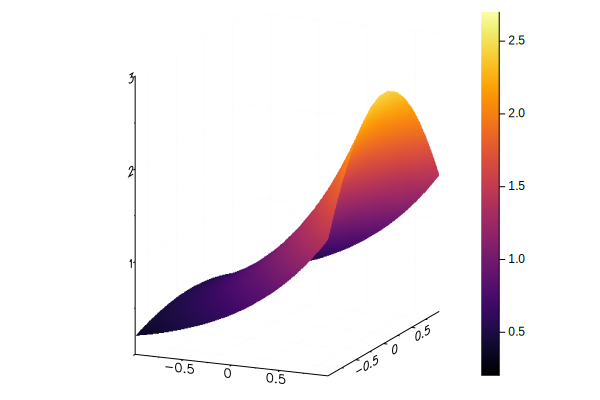

In [5]:
dx =dy = -1.0 .. 1.0
d = dx × dy

x,y = Fun(∂(d))
x,y = components(x),components(y)

g = [-exp(x[1])*sin(-1); exp(1)*cos(y[2]);
      exp(x[3])*cos(1);  exp(-1)*cos(y[4])]


Δ = Laplacian(d)

B = [I⊗lneumann(dy); rneumann(dx)⊗I; I⊗rdirichlet(dy); ldirichlet(dx)⊗I]
u = \([B;Δ], [g;0]; tolerance=1E-10)

plot(u)

# Poisson equation $u_{xx} + u_{yy} = f(x,y)$

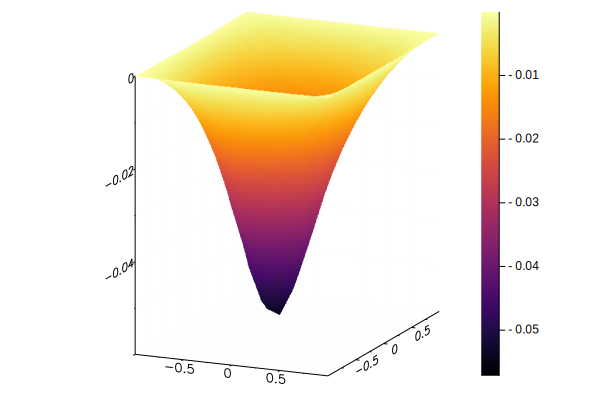

In [6]:
f = Fun((x,y) -> exp(-10(x+0.2)^2-20(y-0.1)^2))  #default is (-1..1)^2
d = domain(f)
Δ = Laplacian(d)
u = [Dirichlet(d); Δ] \ [0; f]
plot(u)

# Helmholtz $u_{xx} + u_{yy} + 100u=0, u|_{\partial d}=1$

In [7]:
d = (-1.0..1.0)^2

Δ = Laplacian(d)

@time u = \([Dirichlet(d);Δ+100I], [ones(∂(d));0]; tolerance=1E-5)
plot(u)

 11.945904 seconds (39.36 M allocations: 1.893 GiB, 8.24% gc time)


In [8]:
d = (-1.0 .. 1.0)^2

Δ = Laplacian(d)

@time u = [Neumann(d); Δ+100I] \ [[[1,1],[1,1]],0]
plot(u)

 15.677472 seconds (34.79 M allocations: 1.878 GiB, 6.39% gc time)


# Screened Poisson  $u_{xx} + u_{yy} - 100u = 0, \partial u(\partial d) = 1$

In [9]:
d = (-1.0 .. 1.0)^2
Δ = Laplacian(d)

@time u = [Neumann(d); Δ-100.0I] \ [[[1,1],[1,1]],0.0]
plot(u)

  3.594031 seconds (11.43 M allocations: 674.974 MiB, 8.03% gc time)


# Convection $u_t + u_x = 0,u(x,0)=e^{-20x^2}, u(-1,t) = 0$

  5.080222 seconds (11.26 M allocations: 798.418 MiB, 14.29% gc time)


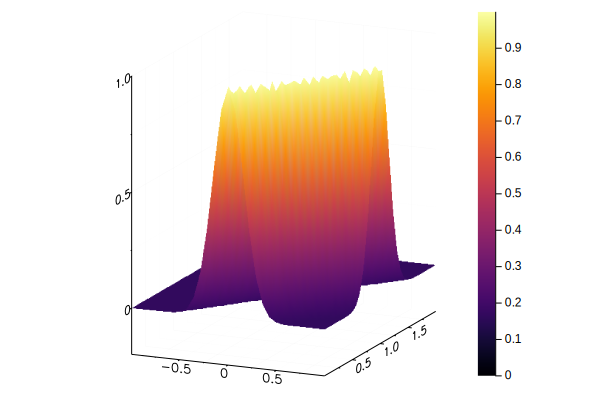

In [10]:
dx = -1.0 .. 1.0; dt = 0.0 .. 2.0
d = dx × dt
Dx = Derivative(d,[1,0]); Dt = Derivative(d,[0,1])
u0 = Fun(x->exp(-20x^2),dx)
@time u = \([I⊗ldirichlet(dt); ldirichlet(dx)⊗I; Dt+Dx], [u0; 0; 0];
            tolerance=1E-3)
plot(u)

## Piecewise PDE $$u_t+\begin{cases} 0.5 & 0≤x≤0.5\cr                     1 & \hbox{otherwise}\end{cases} u_{xx}$$

We can solve on piecewise domains. Here is convection with two different speeds, imposing continuity at the singularities.

In [12]:
a = Fun(x -> 0 ≤ x ≤ 0.5 ? 0.5 : 1, Chebyshev(-1.0 .. 0.0) ∪ Chebyshev(0.0 .. 0.5) ∪ Chebyshev(0.5 .. 1.0))
s = space(a)
dt = 0.0 .. 2.0
Dx = Derivative(s); Dt=Derivative(dt)
Bx = [ldirichlet(s);continuity(s,0)]
@time u = \([I⊗ldirichlet(dt);Bx⊗I;I⊗Dt+(a*Dx)⊗I],
    [Fun(x->exp(-20(x+0.5)^2),s),[0,[0,0]],0.0];tolerance=1E-3)

plot(u)

 53.092770 seconds (259.57 M allocations: 12.791 GiB, 11.43% gc time)


# Convection $u_t - x u_x = 0, u(x,0)=e^{-20x^2}, u(-1,t)=u(1,t)=0$

 32.669462 seconds (140.49 M allocations: 11.281 GiB, 24.01% gc time)


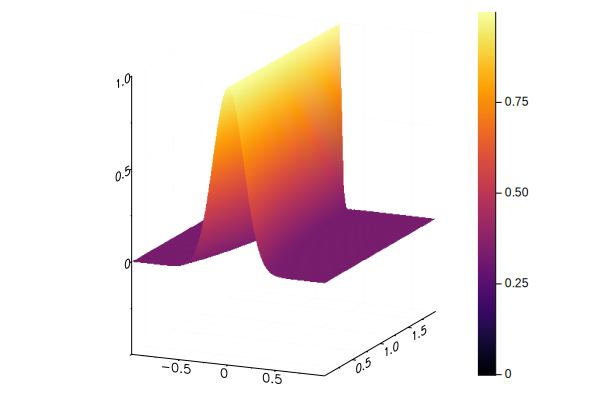

In [15]:
dx = (-1.0 .. 1.0); dt = (0.0 .. 2.0)
d = dx × dt
Dx = Derivative(d,[1,0]); Dt = Derivative(d,[0,1])
x,t = Fun(identity,d)

#timedirichlet is [u(x,0), u(-1,t), u(1,t)]
u0 = Fun(x->exp(-20x^2),dx)
@time u = \([timedirichlet(d);Dt-x*Dx],[u0,[0,0],0];tolerance=1E-3)
plot(u)

# Convection $u_t + x u_x = 0, u(x,0)=e^{-20x^2}$

In [29]:
dx = (-1..1); dt = (0..2)
d=dx*dt
Dx=Derivative(d,[1,0]);Dt=Derivative(d,[0,1])
x,y=Fun(d)
u0=Fun(x->exp(-20x^2),dx)
@time u=\([I⊗ldirichlet(dt);Dt+x*Dx],[u0;0];tolerance=1E-10)
plot(u)

  2.260432 seconds (18.26 M allocations: 1.146 GiB, 46.44% gc time)


# Convection diffusion $u_t = \epsilon u_{xx} + (2+x) u_x, u(x,0)=e^{-20x^2}, u(-1,t)=u(1,t) = 0$

In [13]:
dx = (-1.0 .. 1.0); dt = (0.0..1.0)
d = dx × dt
ε = 0.01
Dx = Derivative(d,[1,0]); Dt = Derivative(d,[0,1])
x,t = Fun(d)
V = 2.0+x
u0 = Fun(x->exp(-20x^2),dx)
@time u = \([timedirichlet(d);Dt-ε*Dx^2-V*Dx],[u0,[0,0],0];
                    tolerance=1E-6)

contourf(u)

  2.741231 seconds (13.46 M allocations: 1.008 GiB, 23.39% gc time)


# Wave equation with left Dirichlet and right Neumann $u_{tt} = u_{xx}, u(x,0)=e^{-20(x-.1)^2},u_t(x,0)=0,u(-1,t)=0,u_x(1,t)=0$

In [31]:
dx=Domain(-1..1);dt=Domain(0..4)
d=dx*dt
Dx=Derivative(d,[1,0]);Dt=Derivative(d,[0,1])
# need to specify both ic and its derivative
B=[I⊗ldirichlet(dt),I⊗lneumann(dt),ldirichlet(dx)⊗I,rneumann(dx)⊗I]

u0=Fun(x->exp(-20(x-.1)^2),dx)
@time u=\([B;Dt^2-Dx^2],[u0;0;0;0;0];
                    tolerance=1E-4)

plot(u)

  6.987815 seconds (39.63 M allocations: 1.870 GiB, 13.69% gc time)


# Linear KdV Dirichlet $u_t + u_{xxx} = 0, u(x,0)=e^{-10x^2},u(-1,t)=u(1,t)=u_x(1,t)=0$

In [32]:
dx=Domain(-5..1);dt=Domain(0..0.1)
d=dx*dt
Dx=Derivative(d,[1,0]);Dt=Derivative(d,[0,1])
B=[timedirichlet(d);rneumann(dx)⊗I]
u0=Fun(x->exp(-10x^2),dx)
@time u=\([B;Dt+Dx^3],[u0,[0,0],0,0];tolerance=1E-3)

plot(u)

 49.882609 seconds (332.54 M allocations: 19.412 GiB, 14.56% gc time)


## Linear KdV Neumann $u_t + u_{xxx} = 0, u(x,0)=e^{-10x^2},u_x(-1,t)=u(1,t)=u_x(1,t)=0$

In [33]:
dx=Domain(-5..1);dt=Domain(0..1)
d=dx*dt
Dx=Derivative(d,[1,0]);Dt=Derivative(d,[0,1])
B=[I⊗ldirichlet(dt);Neumann(dx)⊗I;rdirichlet(dx)⊗I]
u0=Fun(x->exp(-10x^2),dx)
@time u=\([B;Dt+Dx^3],[u0,[0,0],0,0];tolerance=1E-4)

plot(u)

148.810482 seconds (913.40 M allocations: 51.632 GiB, 14.76% gc time)


# Beam equation $u_{tt} + u_{xxxx} = 0, u(x,0)=e^{-200(x-1/2)^2}, u_t(x,0)=u(\pm,t)=u_x(\pm 1,t) = 0$

In [ ]:
dx = (0.0..1); dt = (0..0.03)
d = dx × dt
Dx=Derivative(d,[1,0]); Dt=Derivative(d,[0,1]);
x,t=Fun(d)

u0 = Fun(x->exp(-200(x-.5)^2),dx)

@time u = \(
    [timedirichlet(d); I ⊗ lneumann(dt); Neumann(dx) ⊗ I; Dt^2+Dx^4],
    [u0,[0,0],0,[0,0],0]; tolerance=1E-4)

plot(u)

# Biharmonic equation $\Delta^2 u = f(x,y)$

In [35]:
S = WeightedJacobi(2.,2.)^2

Δ=Laplacian(S)

@time f=chop(Fun((x,y)->exp(-30(x^2+y^2)),rangespace(Δ^2)),1E-10)
@time u=\(Δ^2,f;tolerance=1E-8)
plot(u)

  1.222698 seconds (4.82 M allocations: 1.168 GiB, 28.75% gc time)
  7.113051 seconds (116.66 M allocations: 6.699 GiB, 36.34% gc time)


# Schrödinger Dirichlet $i \epsilon u_t + .5 \epsilon^2 u_{xx} = x^2 u, u(x,0)=e^{-25(x-.5)^2}e^{-i/(5ϵ)log(2cosh(5(x-.5)))}$

In [36]:
dx=Domain(0..1);dt=Domain(0..0.54)
d=dx*dt

ϵ=0.0256
u0=Fun(x->exp(-25*(x-.5)^2)*exp(-1.0im/(5*ϵ)*log(2cosh(5*(x-.5)))),dx)

x,t=Fun(d)
V=x^2

Dt=Derivative(d,[0,1]);Dx=Derivative(d,[1,0])

L=1im*ϵ*Dt+.5*ϵ^2*Dx^2-V

@time u=\([timedirichlet(d);L],[u0,[0,0],0];tolerance=1E-2)

plot(real(u))

 10.940964 seconds (91.36 M allocations: 5.774 GiB, 27.15% gc time)
